In [204]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
df_ADR = pd.read_csv('/Users/hollyhou/Downloads/ADR.csv')
df_pipe = pd.read_csv('/Users/hollyhou/Downloads/hotel_under_construction_2022Q4.csv')
df_IHG = pd.read_csv('/Users/hollyhou/Downloads/IHG_10K_2022.csv')
df_Hyatt = pd.read_csv('/Users/hollyhou/Downloads/Hyatt_10K.csv')
df_sales = pd.read_csv('/Users/hollyhou/Downloads/Company_Sales.csv')


In [205]:
df_pipe.dtypes
df_pipe.head()


,City,Hotel_under_construction,Company,Company_room_under_construction,Room_under_construction
0,Dallas,176,Marriott International,"429,007","20,790"
1,Atlanta,145,Hilton Worldwide,"384,498","18,100"
2,Chengdu,132,Intercontinental Hotels Group,"257,145","26,891"
3,Los Angeles,122,Accor,"163,955","19,419"
4,Shanghai,117,Wyndham Hotels & Resorts,"95,766","22,539"


In [206]:
df_pipe['Company_room_under_construction']= df_pipe['Company_room_under_construction'].str.replace(',', '').astype(int)
df_pipe['Room_under_construction'] = df_pipe['Room_under_construction'].str.replace(',', '').astype(int)


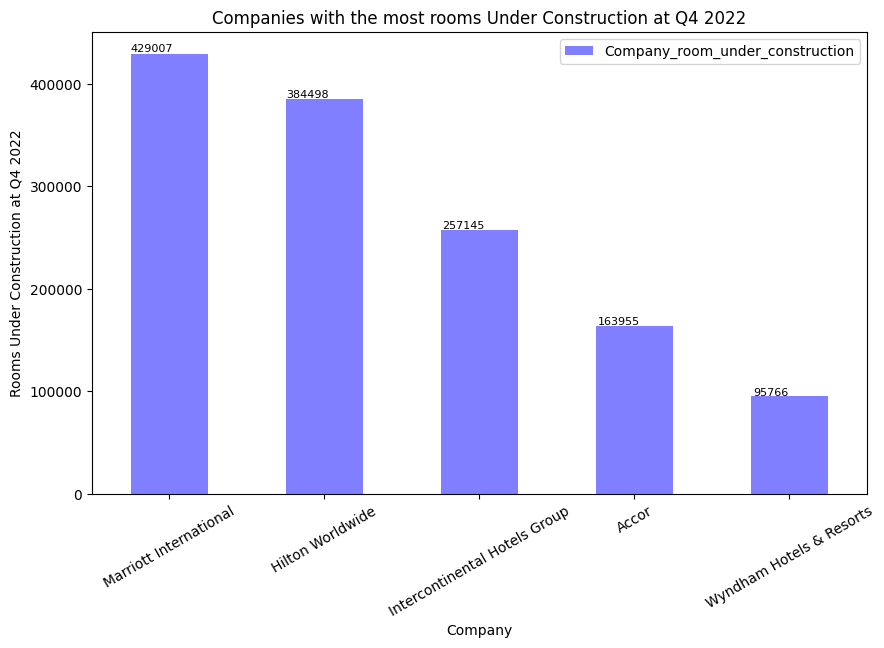

In [228]:
plot_1 = df_pipe.plot(x='Company', y='Company_room_under_construction', kind = 'bar', figsize=(10,6), color = 'b', alpha = 0.5)
plot_1.set_xlabel('Company')
plot_1.set_ylabel('Rooms Under Construction at Q4 2022')
plot_1.set_title('Companies with the most rooms Under Construction at Q4 2022')
plot_1.tick_params(axis='x', rotation = 30)
for p in plot_1.patches:
    plot_1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=8)
plt.show()


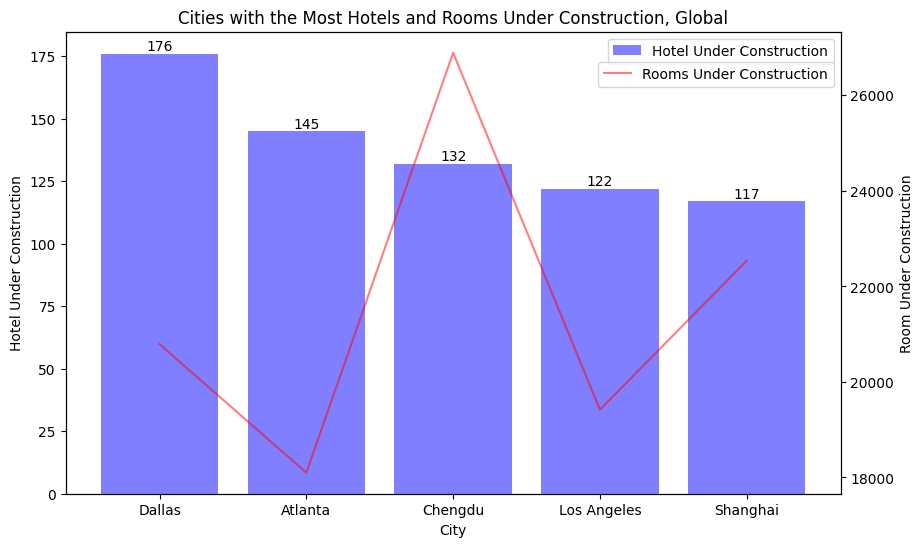

In [105]:
fig, ax1 = plt.subplots(figsize = (10,6))
ax2 = ax1.twinx()
bar1 = ax1.bar(df_pipe['City'], df_pipe['Hotel_under_construction'], label = 'Hotel Under Construction', color = 'b', alpha = 0.5)
line1 = ax2.plot(df_pipe['City'], df_pipe['Room_under_construction'], label = 'Rooms Under Construction', color = 'r', alpha = 0.5)

ax1.set_xlabel('City')
ax1.set_ylabel('Hotel Under Construction')
ax2.set_ylabel('Room Under Construction')
plt.title('Cities with the Most Hotels and Rooms Under Construction, Global')

ax1.legend(loc='upper right', bbox_to_anchor = (1,1))
ax2.legend(loc='upper right', bbox_to_anchor = (1, 0.95))

for bar in bar1:
    yval = bar.get_height()
    xval = bar.get_x() + bar.get_width() / 2
    ax1.text(xval, yval, yval, ha='center', va='bottom')


plt.show()


In [130]:
df_ADR.head()

,Year,ADR_US_Dollars,Market_size_B,Marriot_ADR_NA,Marriott_ADR_Eur,Marriott_ADR_MEA,Mariott_ADR_Asia_Pacific,Marriott_ADR_worldwide,Hyatt_ADR_NA,Marriott_Hotel_Global,IHG_Hotel_Total,Hyatt_Hotel_Total,Hilton_ADR_NA,Hilton_RevPAR_worldwide
0,2001,83.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002,82.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003,82.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004,86.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005,91.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


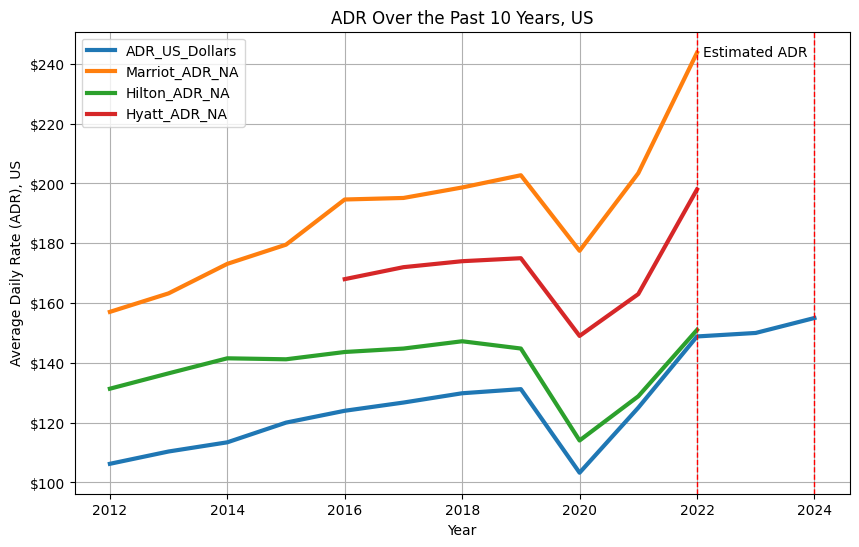

In [214]:
# minor data cleaning
df_ADR = df_ADR.rename(columns={'Year ':'Year'})
ADR_Columns = ['ADR_US_Dollars', 'Marriot_ADR_NA', 'Hilton_ADR_NA','Hyatt_ADR_NA']
df_ADR_year_filtered = df_ADR[df_ADR['Year'] >= 2012]

#plot
plt.figure(figsize=(10, 6))
for col in ADR_Columns:
    plt.plot(df_ADR_year_filtered['Year'], df_ADR_year_filtered[col], label=col, linewidth=3)

plt.axvline(x=2022, color='red', linestyle='--', linewidth=1)
plt.axvline(x=2024, color='red', linestyle='--', linewidth=1)

# Add text label between the dashed lines
plt.text(2023, df_ADR_year_filtered[ADR_Columns].max().max(), 'Estimated ADR', fontsize=10, verticalalignment='center', horizontalalignment='center')

plt.xlabel('Year')
plt.ylabel('Average Daily Rate (ADR), US')
plt.title('ADR Over the Past 10 Years, US')
plt.legend()
plt.grid(True)
formatter = mticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

In [151]:
df_sales.head()

,Leading_sales_company,Sales_B,Unnamed: 2,Unnamed: 3
0,Marriott International Inc. (United States),22.2,NaN,NaN
1,MGM Resorts International (United States),14.1,NaN,NaN
2,Caesars Entertainment Corp. (United States),11.4,NaN,NaN
3,Hilton Worldwide Holdings (United States),9.4,NaN,NaN
4,Hyatt Hotels Corp. (United States),6.3,NaN,NaN


<Figure size 1000x600 with 0 Axes>

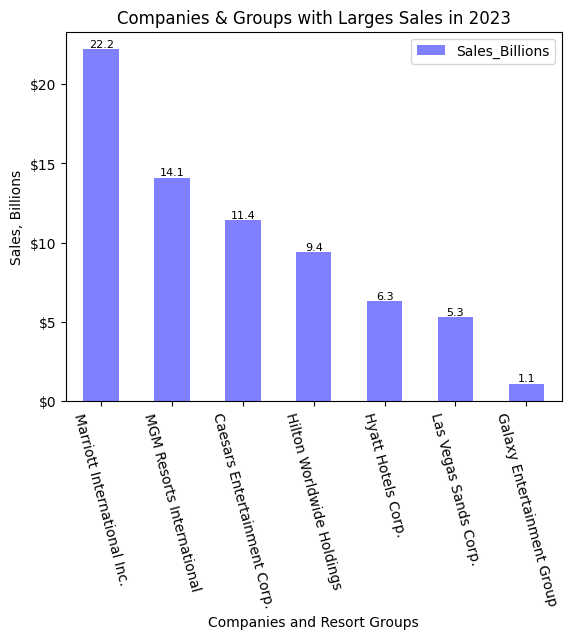

In [226]:
#minor data cleaning
df_sales['Leading_sales_company'] = df_sales['Leading_sales_company'].str.replace(r'\s*\([^)]*\)', '', regex=True)
df_sales = df_sales.rename(columns={'Sales_B':'Sales_Billions'})

#plot
plt.figure(figsize = (10,6))
plot_sales = df_sales.plot(x='Leading_sales_company', y = 'Sales_Billions', kind = 'bar', color = 'b', alpha = 0.5)
plot_sales.set_xlabel('Companies and Resort Groups')
plot_sales.set_ylabel('Sales, Billions')
plot_sales.set_title('Companies & Groups with Larges Sales in 2023')
plot_sales.tick_params(axis='x', rotation = 285)
for index, value in enumerate(df_sales['Sales_Billions']):
    plt.text(index, value, f'{value:.1f}', ha='center', va='bottom', fontsize=8)
formatter = mticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()


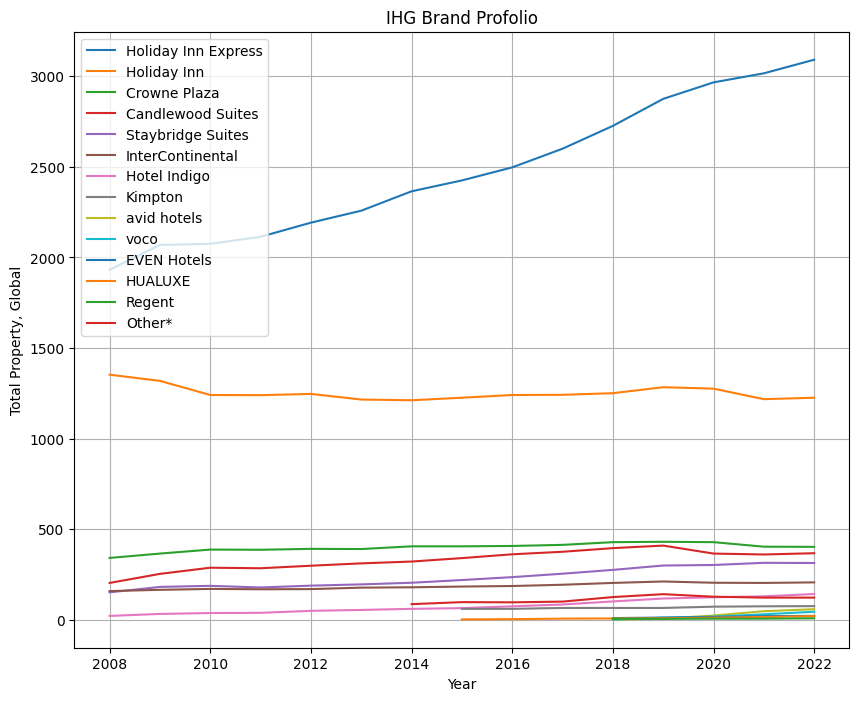

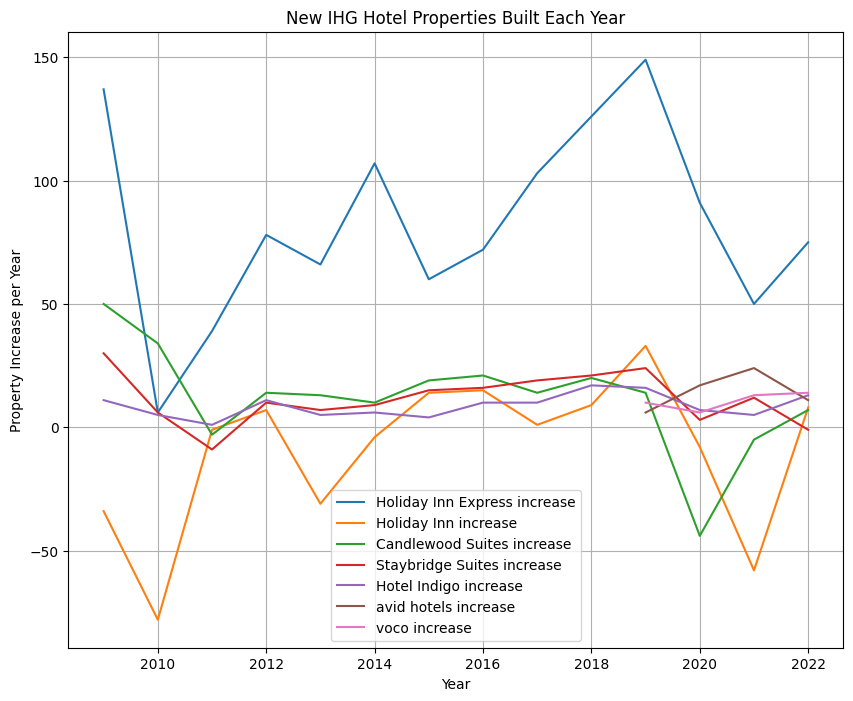

In [229]:
hotel_brands = ['Holiday Inn Express', 'Holiday Inn', 'Crowne Plaza', 'Candlewood Suites', 'Staybridge Suites', 'InterContinental', 'Hotel Indigo', 'Kimpton', 'avid hotels', 'voco', 'EVEN Hotels', 'HUALUXE', 'Regent', 'Other*']

fig, ax = plt.subplots(figsize=(10, 8))

for brand in hotel_brands:
    # Replace non-numeric characters and convert to numeric
    df_IHG[brand] = pd.to_numeric(df_IHG[brand].replace('[^0-9.]', '', regex=True), errors='coerce')
    # Plot data
    ax.plot(df_IHG['Year'], df_IHG[brand], label=brand)

ax.set_xlabel('Year')
ax.set_ylabel('Total Property, Global')
ax.set_title('IHG Brand Profolio')
ax.legend(loc='upper left')
ax.grid(True)

plt.show()

hotel_increase = ['Holiday Inn Express increase', 'Holiday Inn increase', 'Candlewood Suites increase', 'Staybridge Suites increase', 'Hotel Indigo increase', 'avid hotels increase', 'voco increase']


fig, ax = plt.subplots(figsize=(10, 8))

for brand in hotel_increase:
    # Replace non-numeric characters and convert to numeric
    df_IHG[brand] = pd.to_numeric(df_IHG[brand].replace('[^0-9.]', '', regex=True), errors='coerce')
    # Plot data
    ax.plot(df_IHG['Year'], df_IHG[brand], label=brand)

ax.set_xlabel('Year')
ax.set_ylabel('Property Increase per Year')
ax.set_title('New IHG Hotel Properties Built Each Year')
ax.legend()
ax.grid(True)

plt.show()
